The first part of the project consists of two small tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge
from sklearn.metrics import mean_absolute_error as mae
#sns.set()
%matplotlib inline

### TASK 1
The first task consists of fitting the following equation to a set of 50 x/y data points:
$ y  = a * log(x) + b $

The curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps:

- Fit the curve, plot it
- Compute the RSS and $ R^2 $ measures
- Discuss the results, is it a good $ R^2 $ score?

In [2]:
df_1 = pd.read_csv('task-1.csv')
df_1.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
x_1 = df_1.x.values
y_1 = df_1.y.values

coefs_1 = np.polyfit(np.log(x_1),y_1, deg=1)
a_1, b_1 = coefs_1

print(a_1, b_1)

3.3902409977137995 31.52920121929614


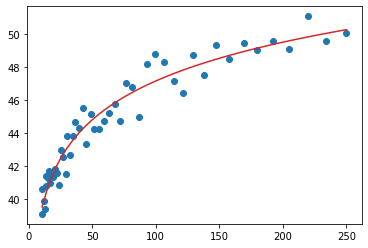

In [6]:
x_values_1 = np.linspace(x_1.min(), x_1.max(), num=len(x_1))
y_values_1 = np.polyval(coefs_1, np.log(x_values_1))

plt.scatter(x_1,y_1)
plt.plot(x_values_1, y_values_1, c='C3', label='po1yfit(deg=1)')


plt.show()

In [5]:
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y,y_pred)))

rss_baseline_1 = RSS(y_1, y_1.mean())
rss_model_1 = RSS(y_1, np.polyval(coefs_1, np.log(x_1)))


R2_1 = 1 - (rss_model_1 / rss_baseline_1)
print(R2_1)

0.9411567093138288


R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
R-squared is always between 0 and 100%:
- 0 indicates that the model explains none of the variability of the response data around its mean.
- 1 indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits the data, in our case R-squared is 0.94.

### TASK 2
The second task consists of fitting a model to a set of data points that contains outliers.
The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

- Fit a linear regression with the outliers
- Fit a huber regression with the outliers
- Fit a linear regression without the outliers

The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

In [7]:
df_2 = pd.read_csv('task-2.csv')
df_2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [8]:
train_df, test_df = train_test_split(df_2, train_size=0.8, test_size=0.2, random_state=0)

print('Train DataFrame:', train_df.shape)
print('TestDataFrame:', test_df.shape)

X_tr = train_df.drop('y', axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop('y', axis=1).values
y_te = test_df.y.values

Train DataFrame: (800, 4)
TestDataFrame: (200, 4)


In [9]:
# Linear regression
lr = LinearRegression()
lr.fit(X_tr,y_tr) 
y_pred_1r = lr.predict(X_te)

print ('Coefficients:', lr.coef_)
print ('Intercept:', lr.intercept_)

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176


In [10]:
mae_lr = mae(y_te, y_pred_1r)
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE linear regression: 104.788


In [11]:
# Removing Outliers
train_df_no_outliers = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

X_tr_n_o = train_df_no_outliers.drop('y', axis=1).values
y_tr_n_o = train_df_no_outliers.y.values

In [12]:
# Linear regression without ourliers
lr = LinearRegression()
lr.fit(X_tr_n_o, y_tr_n_o)
y_pred_1r_n_o = lr.predict(X_te)
    
mae_lr = mae(y_te, y_pred_1r_n_o)
print('MAE linear regression (without outliers): {:.3f}'.format(mae_lr))

MAE linear regression (without outliers): 70.997


In [13]:
# Huber loss
huber = HuberRegressor()
huber.fit(X_tr, y_tr) 
y_pred_huber = huber.predict(X_te)

mae_huber= mae(y_te, y_pred_huber) 
print('MAE Huber: {:.3f}'.format(mae_huber))

MAE Huber: 83.908


As anticipated, both the linear regression without outliers and the huber regression models performed better than the linear regression with outliers.